In [1]:
from fastai.vision.all import *
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/bangladeshi_landmarks

/content/drive/MyDrive/bangladeshi_landmarks


In [4]:
version = 2
models_path = Path("models")
test_path = Path("/content/drive/MyDrive/bangladeshi_landmarks/test ")

In [5]:
best_model_name = "vgg19_bn"
learner = load_learner(f"{best_model_name}_v{version}.pkl")

/usr/local/lib/python3.12/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


Test Accuracy (vgg19_bn): 0.9975


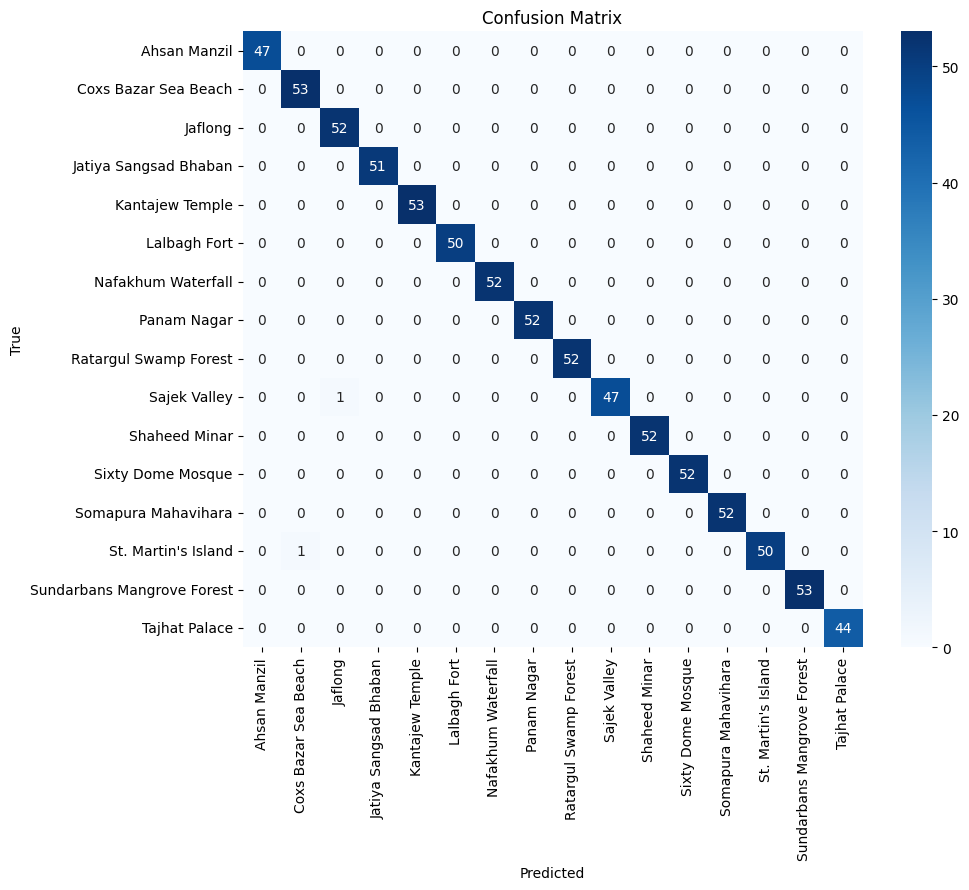


Classification Report:
                            precision    recall  f1-score   support

              Ahsan Manzil       1.00      1.00      1.00        47
      Coxs Bazar Sea Beach       0.98      1.00      0.99        53
                   Jaflong       0.98      1.00      0.99        52
     Jatiya Sangsad Bhaban       1.00      1.00      1.00        51
           Kantajew Temple       1.00      1.00      1.00        53
              Lalbagh Fort       1.00      1.00      1.00        50
        Nafakhum Waterfall       1.00      1.00      1.00        52
               Panam Nagar       1.00      1.00      1.00        52
     Ratargul Swamp Forest       1.00      1.00      1.00        52
              Sajek Valley       1.00      0.98      0.99        48
             Shaheed Minar       1.00      1.00      1.00        52
         Sixty Dome Mosque       1.00      1.00      1.00        52
       Somapura Mahavihara       1.00      1.00      1.00        52
       St. Martin's Isl

In [6]:
test_files = get_image_files(test_path)
test_dl = learner.dls.test_dl(test_files)

preds, _ = learner.get_preds(dl=test_dl)
y_pred = preds.argmax(dim=1)

# Get true labels from the parent directory names
y_true_labels = [f.parent.name for f in test_files]

# Get the vocabulary and remove trailing spaces
vocab = [lbl.strip() for lbl in learner.dls.vocab]

# Convert true labels to tensor using the cleaned vocabulary
y_true = tensor([vocab.index(lbl.strip()) for lbl in y_true_labels])


if y_true is not None:
    # Calculate accuracy only if true labels are available
    acc = accuracy(preds, y_true).item()
    print(f"Test Accuracy ({best_model_name}): {acc:.4f}")

    # Calculate and display Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=vocab, yticklabels=vocab)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate and display Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=vocab))
else:
    print("True labels (y_true) are not provided. Cannot calculate accuracy, confusion matrix, or classification report.")